<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Заполнение-пропусков" data-toc-modified-id="Заполнение-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Заполнение пропусков</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Исправление-названий-столбцов-и-приведение-значений-к-одному-регистру" data-toc-modified-id="Исправление-названий-столбцов-и-приведение-значений-к-одному-регистру-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исправление названий столбцов и приведение значений к одному регистру</a></span></li></ul></li><li><span><a href="#Добавление-столбцов-с-новыми-параметрами" data-toc-modified-id="Добавление-столбцов-с-новыми-параметрами-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Добавление столбцов с новыми параметрами</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-параметров-и-избавление-от-выбросов" data-toc-modified-id="Изучение-параметров-и-избавление-от-выбросов-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучение параметров и избавление от выбросов</a></span></li><li><span><a href="#Зависимость-стоимости-квартиры-от-различных-факторов" data-toc-modified-id="Зависимость-стоимости-квартиры-от-различных-факторов-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Зависимость стоимости квартиры от различных факторов</a></span></li><li><span><a href="#Выборка-характерных-населённых-пунктов" data-toc-modified-id="Выборка-характерных-населённых-пунктов-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Выборка характерных населённых пунктов</a></span></li><li><span><a href="#Определение-границ-центральной-зоны" data-toc-modified-id="Определение-границ-центральной-зоны-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Определение границ центральной зоны</a></span></li><li><span><a href="#Сопоставление-данных-для-квартир-в-центре-и-всего-датасета" data-toc-modified-id="Сопоставление-данных-для-квартир-в-центре-и-всего-датасета-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Сопоставление данных для квартир в центре и всего датасета</a></span><ul class="toc-item"><li><span><a href="#Изучение-параметров" data-toc-modified-id="Изучение-параметров-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Изучение параметров</a></span></li><li><span><a href="#Зависимость-стоимости-квартиры-от-различных-факторов" data-toc-modified-id="Зависимость-стоимости-квартиры-от-различных-факторов-4.5.2"><span class="toc-item-num">4.5.2&nbsp;&nbsp;</span>Зависимость стоимости квартиры от различных факторов</a></span></li></ul></li></ul></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоговый вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

**Цель исследования** — установить параметры для определения рыночной стоимости объектов недвижимости, что в свою очередь позволит построить автоматизированную систему, отслеживающую аномалии и мошенническую деятельность.

Имеющиеся данные — архив объявлений сервиса Яндекс Недвижимость о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

**Ход исследования**

Получим данные из файла `real_estate_data.csv`, после чего изучим их.

Проверим данные на пропущенные значения и артефакты, при надобности исправим их на этапе предобработки.

Далее добавим в таблицу следующие параметры для дальнейшего определения факторов, от которых в первую очередь зависит стоимость квартир:
1. цену квадратного метра;
2. день недели, месяц и год публикации объявления;
3. категории этажа квартиры: первый, последний, другой;
4. соотношение жилой и общей площади, отношение площади кухни к общей.

После чего проанализируем обработанные данные и сформулируем итоговые выводы.
 
Таким образом, исследование пройдёт в пять этапов:
 1. Изучение данных.
 2. Предобработка данных.
 3. Добавление параметров.
 4. Анализ данных.
 5. Итоговый вывод о ключевых факторах для определения стоимости.

## Изучение данных

In [1]:
# импоорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# чтение csv-файла и создание датафрейма
df = pd.read_csv('data_real_estate.csv', sep='\t')

In [3]:
# получение случайных 15 строк таблицы df
df.sample(15, random_state=1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
17338,5,3300000.0,47.0,2018-03-30T00:00:00,1,3.00,10.0,NaN,4,NaN,...,NaN,NaN,деревня Новое Девяткино,NaN,NaN,NaN,NaN,NaN,NaN,42.0
13876,12,2290000.0,40.0,2016-01-17T00:00:00,2,3.00,3.0,27.0,2,False,...,7.4,NaN,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,895.0
3586,0,5450000.0,53.8,2018-02-01T00:00:00,2,2.85,2.0,36.5,2,NaN,...,5.3,1.0,Санкт-Петербург,38914.0,10617.0,1.0,255.0,0.0,NaN,64.0
6495,1,5482990.0,66.1,2016-02-19T00:00:00,2,NaN,25.0,43.6,1,NaN,...,11.1,0.0,поселок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,469.0
14431,5,4190000.0,54.0,2017-10-30T00:00:00,2,3.00,12.0,34.0,3,NaN,...,9.0,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,73.0
8363,13,5690000.0,41.7,2016-12-29T00:00:00,2,3.20,5.0,23.0,2,NaN,...,7.5,0.0,Санкт-Петербург,23963.0,3530.0,2.0,352.0,3.0,341.0,283.0
15270,15,4999000.0,42.0,2018-11-23T00:00:00,1,2.80,17.0,22.0,4,NaN,...,11.0,2.0,Санкт-Петербург,30571.0,11470.0,1.0,721.0,0.0,NaN,60.0
2143,4,3350000.0,55.5,2017-11-14T00:00:00,2,NaN,5.0,33.5,3,NaN,...,8.5,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,211.0
11284,17,3200000.0,48.0,2017-10-25T00:00:00,1,2.80,9.0,19.0,4,NaN,...,11.5,2.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,246.0
17095,8,5100000.0,50.2,2018-10-06T00:00:00,2,2.50,3.0,28.0,1,NaN,...,5.4,NaN,Пушкин,12671.0,24825.0,1.0,171.0,0.0,NaN,23.0


In [4]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
# получение данных о характерных значениях для столбцов df
df.describe().style.format('{:.2f}')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00,23699.00,23699.00,23699.00,14504.00,23613.00,21796.00,23699.00,21421.00,12180.00,18157.00,18180.00,18181.00,8079.00,18181.00,9110.00,20518.00
mean,9.86,6541548.77,60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,28793.67,14191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,10887013.27,35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,12630.88,8608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18585.00,9238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4650000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26726.00,13098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6800000.00,69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,37273.00,16293.00,1.00,612.00,1.00,729.00,232.00
max,50.00,763000000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


**Промежуточные выводы**

Предварительно взглянув на данные, можно заметить определённые проблемы и артефакты, например:

1. В большинстве столбцов в том или ином количестве присутствуют пропущенные значения.
2. Для многих столбцов выбраны типы данных, не соответствующие характеру этих данных: `float` вместо `int`, `object` вместо `datetime` или `bool`.
3. Проблемы с наименованиями столбцов: встречаются записи не в одном регистре, слитное написание отдельных слов, не совсем характерные по смыслу названия, например, `airports_nearest` было бы логичнее назвать `m_to_nearest_airport`.
4. Значения `locality_name` также отображаются в разном регистре.
5. Помещения со стоимостью в районе 12 190 при значении первого квартиля для данного региона, равном 3 400 000, как и имеющие высооту потолка 1 м, вряд ли являются жилыми в принципе; также нереалистично выглядит, например, значение высоты потолка 100 м.

## Предобработка данных

### Заполнение пропусков

При изучении данных было замечено, что пропуски присутствуют в большинстве столбцов. Оценим долю пропусков в каждом, что в дополнение к информации о том, значения какого именно параметра пропущены, поможет определиться с тем, что следует сделать с найденными пропусками — заменить какими-либо значениями или же оставить как есть.

In [6]:
# вывод доли пропущенных значений столбцов df
for column in df.columns:
    missing_values_part = df[column].isna().mean()
    print(f'Доля пропущенных значений столбца {column} равна {missing_values_part:.2%}')

Доля пропущенных значений столбца total_images равна 0.00%
Доля пропущенных значений столбца last_price равна 0.00%
Доля пропущенных значений столбца total_area равна 0.00%
Доля пропущенных значений столбца first_day_exposition равна 0.00%
Доля пропущенных значений столбца rooms равна 0.00%
Доля пропущенных значений столбца ceiling_height равна 38.80%
Доля пропущенных значений столбца floors_total равна 0.36%
Доля пропущенных значений столбца living_area равна 8.03%
Доля пропущенных значений столбца floor равна 0.00%
Доля пропущенных значений столбца is_apartment равна 88.29%
Доля пропущенных значений столбца studio равна 0.00%
Доля пропущенных значений столбца open_plan равна 0.00%
Доля пропущенных значений столбца kitchen_area равна 9.61%
Доля пропущенных значений столбца balcony равна 48.61%
Доля пропущенных значений столбца locality_name равна 0.21%
Доля пропущенных значений столбца airports_nearest равна 23.38%
Доля пропущенных значений столбца cityCenters_nearest равна 23.29%
Дол

Рассмотрим также корреляцию параметров квартир, возможно, какие-то столбцы с пропусками сильно связаны с другими столбцами, на что можно будет ориентироваться при замене значений.

In [7]:
# получение значений корреляции столбцов df
df.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,-0.029303,-0.024407,0.104756,0.121693,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,-0.025362,-0.008802,0.519869,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.001674,0.042777,0.087641,0.040523,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,0.070151,0.050791,0.163944,0.194065,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,-0.056231,-0.033711,0.428674,0.018849,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168773,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,1.000000,-0.004235,NaN,0.031455,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476
open_plan,-0.024407,-0.008802,-0.034885,-0.087500,0.042777,0.050791,-0.033711,0.035824,-0.004235,1.000000,NaN,0.019491,-0.013583,-0.004204,-0.010077,0.010612,0.008455,-0.003328,-0.024112


Можно заметить сильную корреляцию между значениями жилой площади и общей площади квартиры. Учитывая это, заменим пропуски столбца `living_area` на основании связи со значениями `total_area`. Для начала также проверим, нет ли ошибки во взаимосвязи значений разных площадей, по логике, общая площадь должна быть всегда больше жилой площади и кухни вместе взятых.  

In [8]:
# получение доли корректных объявлений
len(df.query('total_area > kitchen_area + living_area')) / len(df)

0.8796995653825056

Не все данные соответствуют необходимому условию. Взглянем на ошибочные объявления.

In [9]:
df.query('total_area <= kitchen_area + living_area').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000.0,30.20,2018-02-14T00:00:00,1,2.65,9.0,26.10,5,NaN,...,6.20,NaN,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
220,8,3890000.0,37.00,2018-07-09T00:00:00,1,2.50,25.0,28.00,6,NaN,...,9.00,NaN,Санкт-Петербург,25408.0,16166.0,0.0,NaN,0.0,NaN,28.0
545,9,4700000.0,23.80,2018-12-28T00:00:00,1,NaN,18.0,20.00,9,NaN,...,5.00,NaN,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
551,8,3100000.0,31.59,2018-03-08T00:00:00,1,2.70,19.0,30.55,2,NaN,...,9.28,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,70.0
601,12,5600000.0,53.70,2017-04-18T00:00:00,2,2.50,12.0,48.30,5,NaN,...,7.00,2.0,Санкт-Петербург,50477.0,13252.0,2.0,220.0,1.0,1250.0,167.0
696,1,3364930.0,34.69,2014-11-27T00:00:00,1,2.64,25.0,23.43,25,NaN,...,23.43,2.0,Санкт-Петербург,43396.0,12153.0,0.0,NaN,0.0,NaN,574.0
1060,10,5200000.0,50.00,2015-11-06T00:00:00,2,NaN,35.0,39.00,15,False,...,20.50,2.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,281.0
1155,11,7000000.0,38.00,2019-04-09T00:00:00,1,3.20,5.0,33.00,1,NaN,...,12.00,NaN,Санкт-Петербург,31501.0,3670.0,1.0,183.0,3.0,689.0,NaN
1354,14,7300000.0,54.50,2018-08-20T00:00:00,2,NaN,16.0,38.00,12,NaN,...,19.00,2.0,Санкт-Петербург,51030.0,14721.0,0.0,NaN,0.0,NaN,NaN
1407,9,3250000.0,24.60,2018-06-29T00:00:00,1,NaN,25.0,18.00,16,NaN,...,18.20,NaN,Санкт-Петербург,35250.0,16414.0,0.0,NaN,1.0,400.0,96.0


Скорее всего, в данных случаях площадь кухни включена также и в жилую площадь. Скорректируем значения общей площади, дабы у всего датасета была единая логика. Если же при этом площадь кухни равна или больше (что, скорее всего, опечатка) жилой, оставим только последнюю, а площадь кухни сделаем нулевой.

In [10]:
# изменение значений по условиям
df.loc[(df.total_area <= df.kitchen_area + df.living_area) & (df.kitchen_area >= df.living_area), 'kitchen_area'] = 0
df.loc[df.total_area <= df.kitchen_area + df.living_area, 'living_area'] = df.living_area - df.kitchen_area

# проверка успешности изменений
len(df.query('total_area <= kitchen_area + living_area'))

0

Теперь можно заменять пропуски в `living_area`.

In [11]:
# замена пропущенных значений жилой площади
from sklearn.impute import KNNImputer
df[['living_area', 'total_area']] = (
    KNNImputer()
    .fit_transform(
    df[['living_area',
    'total_area']])
)

# проверка соответствия условию
len(df.query('total_area <= kitchen_area + living_area'))

9

In [12]:
# повторное изменение значений по условиям
df.loc[(df.total_area <= df.kitchen_area + df.living_area) & (df.kitchen_area >= df.living_area), 'kitchen_area'] = 0
df.loc[df.total_area <= df.kitchen_area + df.living_area, 'living_area'] = df.living_area - df.kitchen_area

Очень высокая доля пропусков столбца `is_apartment`, скорее всего, объясняется его неверным типом данных, исправим это в дальнейшем.

Отсутствующие значения числа балконов, вероятно, говорят о том, что в данных квартирах их нет в принципе. Заменим эти пропуски на 0. 

In [13]:
# замена пропусков нулевыми значениями
df.balcony = df.balcony.fillna(0)

Помимо прочего видно, что есть много строк с пропусками во всех столбцах, значения которых зависят от точного месторасположения объекта, да и доля пропущенных значений у них равна. По всей видимости, для данных квартир просто в принципе не указана их геолокация. Посмотрим, насколько много квартир с одновременно пропущенными значениями в данных столбцах.

In [14]:
# получение количества строк с одновременными пропусками
display((df.parks_around3000.isna() == df.ponds_around3000.isna()).value_counts())
display((df.parks_around3000.isna() == df.cityCenters_nearest.isna()).value_counts())
display((df.parks_around3000.isna() == df.airports_nearest.isna()).value_counts())
display((df.airports_nearest.isna() == df.cityCenters_nearest.isna()).value_counts())
display((df.airports_nearest.isna() == df.ponds_around3000.isna()).value_counts())

True    23699
dtype: int64

True     23698
False        1
dtype: int64

True     23675
False       24
dtype: int64

True     23674
False       25
dtype: int64

True     23675
False       24
dtype: int64

Подавляющее большинство подобных пропусков присутствует одновременно во всех рассматриваемых столбцах, что говорит в пользу предположения о причине появления пропущенных значений в данном случае. За неимением инфоормации заменить пропуски какими-то адекватными характерными значениями невозможно.

Взглянем на распределение значений с количеством парков и водоёмов в радиусе 3 км.

In [15]:
# получение распределения значений
display(df.parks_around3000.value_counts().to_frame())
display(df.ponds_around3000.value_counts().to_frame())

,parks_around3000
0.0,10106
1.0,5681
2.0,1747
3.0,647


,ponds_around3000
0.0,9071
1.0,5717
2.0,1892
3.0,1501


Более чем в половине случаев эти объекты отсутствуют в данном радиусе. Можно предположить, что большая часть от пропущенных значений столбцов `parks_nearest` и `ponds_nearest`, которых также достаточно много (в районе 60%), приходится на квартиры, рядом с которыми нет соответственно парков или водоёмов. 

In [16]:
# получение доли соответствующих пропусков
display(df.query('parks_around3000 == 0')
        ['parks_nearest'].isna().mean())
display(df.query('ponds_around3000 == 0')
        ['ponds_nearest'].isna().mean())

0.9996041955274094

1.0

Так и есть. Следовательно, расстояние до ближайших рассматриваемых объектов не указано по причине их отсутствия в рассматриваемом радиусе. Заполнить данные пропуски также нечем, оставим их в изначальном виде.

Причину появления пропущенных значений в оставшихся столбцах — `ceiling_height`, `kitchen_area`, `days_exposition`, `floors_total` и `locality_name`, как и возможность их замены, выяснить за отсутствием дополнительной информации и значительной корреляции проблематично. Доля пропусков в первых трёх оставшихся столбцах достаточно велика, следовательно, и удалять строки с ними не следует. В последних же двух эта доля менее 1%, соответствующие строки можно убрать.

In [17]:
# удаление строк с соответствующими пропусками
df = df.dropna(subset=['floors_total', 
    'locality_name']).reset_index(drop=True)

Далее проверим успешность избавления от пропусков в обработанных столбцах.

In [18]:
# проверка успешности замены пропусков
df.isna().sum() 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area                 0
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

**Промежуточные итоги**

Учитывая характер пропусков и корреляцию столбцов датафрейма, пропущенные значения, где это возможно, были заменены. Для некоторых случаев были также найдены возможные причины появления пропусков.

Так как доля пропущенных значений была достаточно велика, они были оставлены пустыми, так как при удалении строк с ними могла потеряться важная часть общих данных.

### Изменение типов данных

В исходном датафрейме для значений многих параметров используются не совсем подходящие типы данных. Заменим их на более соответствующие.

In [19]:
# изменение числовых типов данных
df[['last_price',
    'floors_total',
    'balcony',
    'total_images',
    'rooms',
    'floor']] = (
    df[['last_price',
    'floors_total',
    'balcony',
    'total_images',
    'rooms',
    'floor']].astype('int')
)
df[['airports_nearest',
    'parks_around3000',
    'cityCenters_nearest',
    'parks_nearest',
    'ponds_around3000',
    'ponds_nearest']] = (
    df[['airports_nearest',
    'parks_around3000',
    'cityCenters_nearest',
    'parks_nearest',
    'ponds_around3000',
    'ponds_nearest']]
    .convert_dtypes()
    .astype('Int32')
)

Для значений даты нам понадобится только день, округлим их соответствующим образом.

In [20]:
# изменение типа данных для даты
df.first_day_exposition = (
    pd.to_datetime(
    df.first_day_exposition,
    format='%Y-%m-%dT%H:%M:%S')
    .dt.round('1D')
)

In [21]:
# установление логического типа данных
df.is_apartment = df.is_apartment.astype('bool')

Взглянем на итоговые изменения.

In [22]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int32         
 1   last_price            23565 non-null  int32         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int32         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int32         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int32         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

In [23]:
# получение случайных 15 строк таблицы df
df.sample(15, random_state=1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
14113,2,33415200,140.4,2019-03-31,3,3.0,11,79.40,5,False,...,13.6,0,Санкт-Петербург,28282,6941,2,365,3,215,NaN
1883,12,4900000,62.0,2017-11-29,3,NaN,12,41.00,9,True,...,7.0,1,Санкт-Петербург,45992,13643,1,565,1,1118,6.0
7013,18,3699000,42.0,2017-03-01,2,2.8,25,25.50,19,False,...,10.0,2,посёлок Мурино,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,178.0
18988,9,2850000,54.5,2016-07-04,2,3.3,3,32.60,2,True,...,8.2,0,деревня Ваганово,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,238.0
3498,10,3500000,70.0,2017-12-03,3,2.5,12,43.16,10,True,...,8.0,2,Кингисепп,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,300.0
6249,15,4300000,39.1,2017-05-26,1,NaN,9,24.00,7,True,...,11.0,1,Санкт-Петербург,39847,11550,1,326,0,<NA>,6.0
19542,1,5300000,56.0,2017-12-01,3,NaN,5,39.00,1,True,...,6.0,0,Санкт-Петербург,31158,5663,1,571,1,909,119.0
1544,11,4500000,38.7,2018-09-05,1,2.7,12,20.10,11,True,...,10.3,0,Санкт-Петербург,37793,12690,0,<NA>,1,890,106.0
7134,17,4050000,39.9,2017-01-27,1,NaN,18,20.00,11,True,...,10.7,0,Санкт-Петербург,28698,13286,1,628,1,441,374.0
5601,20,6200000,80.0,2014-12-10,3,2.7,5,55.60,4,True,...,11.1,2,Всеволожск,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN


In [24]:
# проверка отсутствия пропусков столбца is_apartment
df.is_apartment.isna().sum() 

0

**Промежуточные итоги**

В соответствии с характером значений типы данных были измененены на более подходящие, благодаря чему в том числе в столбце с информацией об апартаментах теперь также нет пропусков.

### Исправление названий столбцов и приведение значений к одному регистру

Для дальнейшего удобства работы с датасетом изменим некорректные названия столбцов и приведём значения единственного столбца с типом данных `object` к нижнему регистру.

In [25]:
# замена названий столбцов
df = df.rename(
    columns={'is_apartment': 'apartment',
    'airports_nearest': 'm_to_nearest_airport',
    'cityCenters_nearest': 'm_to_city_center',
    'parks_around3000': 'parks_around_3000_m',
    'parks_nearest': 'm_to_nearest_park',
    'ponds_around3000': 'ponds_around_3000_m',
    'ponds_nearest': 'm_to_nearest_ponds'}
)

In [26]:
# приведение всех значений к нижнему регистру
df.locality_name = df.locality_name.str.lower()

Проверим успешность изменений.

In [27]:
# получение случайных 15 строк таблицы df
df.sample(15, random_state=1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,apartment,...,kitchen_area,balcony,locality_name,m_to_nearest_airport,m_to_city_center,parks_around_3000_m,m_to_nearest_park,ponds_around_3000_m,m_to_nearest_ponds,days_exposition
14113,2,33415200,140.4,2019-03-31,3,3.0,11,79.40,5,False,...,13.6,0,санкт-петербург,28282,6941,2,365,3,215,NaN
1883,12,4900000,62.0,2017-11-29,3,NaN,12,41.00,9,True,...,7.0,1,санкт-петербург,45992,13643,1,565,1,1118,6.0
7013,18,3699000,42.0,2017-03-01,2,2.8,25,25.50,19,False,...,10.0,2,посёлок мурино,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,178.0
18988,9,2850000,54.5,2016-07-04,2,3.3,3,32.60,2,True,...,8.2,0,деревня ваганово,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,238.0
3498,10,3500000,70.0,2017-12-03,3,2.5,12,43.16,10,True,...,8.0,2,кингисепп,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,300.0
6249,15,4300000,39.1,2017-05-26,1,NaN,9,24.00,7,True,...,11.0,1,санкт-петербург,39847,11550,1,326,0,<NA>,6.0
19542,1,5300000,56.0,2017-12-01,3,NaN,5,39.00,1,True,...,6.0,0,санкт-петербург,31158,5663,1,571,1,909,119.0
1544,11,4500000,38.7,2018-09-05,1,2.7,12,20.10,11,True,...,10.3,0,санкт-петербург,37793,12690,0,<NA>,1,890,106.0
7134,17,4050000,39.9,2017-01-27,1,NaN,18,20.00,11,True,...,10.7,0,санкт-петербург,28698,13286,1,628,1,441,374.0
5601,20,6200000,80.0,2014-12-10,3,2.7,5,55.60,4,True,...,11.1,2,всеволожск,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN


## Добавление столбцов с новыми параметрами

Для удобства, большей вариативности и информативности при последующем анализе данных добавим в датафрейм новые столбцы со следующими показателями:
1. цена квадратного метра;
2. день недели, месяц и год публикации объявления;
3. категории этажа квартиры: первый, последний, другой;
4. соотношение жилой и общей площади, отношение площади кухни к общей.

In [28]:
# создание столбца с ценой кв.м.
df['price_square_m'] = (
(df.last_price / df.total_area)
.astype('int')
)
# создание столбцов с отдельными показателями даты размещения объявления
df['day_of_week_exposition'] = df.first_day_exposition.dt.weekday
df['month_exposition'] = df.first_day_exposition.dt.month
df['year_exposition'] = df.first_day_exposition.dt.year

In [29]:
# создание функции для категоризации значений
def floor_category(row):
    floor = row['floor']
    last_floor = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == last_floor:
        return 'последний'
    return 'другой'

# тестирование функции
row_values = [1, 2]
row_columns = ['floor', 'floors_total']
row = pd.Series(data=row_values, index=row_columns) 
display(floor_category(row))

row_values = [2, 2]
row_columns = ['floor', 'floors_total']
row = pd.Series(data=row_values, index=row_columns) 
display(floor_category(row))

row_values = [2, 3]
row_columns = ['floor', 'floors_total']
row = pd.Series(data=row_values, index=row_columns) 
display(floor_category(row))

'первый'

'последний'

'другой'

In [30]:
# создание столбца с категорией этажа
df['floor_category'] = df.apply(floor_category, axis=1)

# создание столбцов с соотношениями типа площади к общей
df['living_area_ratio'] = df.living_area / df.total_area
df['kitchen_area_ratio'] = df.kitchen_area / df.total_area

Взглянем на обновлённую таблицу.

In [31]:
# получение случайных 15 строк таблицы df
df.sample(15, random_state=1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,apartment,...,ponds_around_3000_m,m_to_nearest_ponds,days_exposition,price_square_m,day_of_week_exposition,month_exposition,year_exposition,floor_category,living_area_ratio,kitchen_area_ratio
14113,2,33415200,140.4,2019-03-31,3,3.0,11,79.40,5,False,...,3,215,NaN,238000,6,3,2019,другой,0.565527,0.096866
1883,12,4900000,62.0,2017-11-29,3,NaN,12,41.00,9,True,...,1,1118,6.0,79032,2,11,2017,другой,0.661290,0.112903
7013,18,3699000,42.0,2017-03-01,2,2.8,25,25.50,19,False,...,<NA>,<NA>,178.0,88071,2,3,2017,другой,0.607143,0.238095
18988,9,2850000,54.5,2016-07-04,2,3.3,3,32.60,2,True,...,<NA>,<NA>,238.0,52293,0,7,2016,другой,0.598165,0.150459
3498,10,3500000,70.0,2017-12-03,3,2.5,12,43.16,10,True,...,<NA>,<NA>,300.0,50000,6,12,2017,другой,0.616571,0.114286
6249,15,4300000,39.1,2017-05-26,1,NaN,9,24.00,7,True,...,0,<NA>,6.0,109974,4,5,2017,другой,0.613811,0.281330
19542,1,5300000,56.0,2017-12-01,3,NaN,5,39.00,1,True,...,1,909,119.0,94642,4,12,2017,первый,0.696429,0.107143
1544,11,4500000,38.7,2018-09-05,1,2.7,12,20.10,11,True,...,1,890,106.0,116279,2,9,2018,другой,0.519380,0.266150
7134,17,4050000,39.9,2017-01-27,1,NaN,18,20.00,11,True,...,1,441,374.0,101503,4,1,2017,другой,0.501253,0.268170
5601,20,6200000,80.0,2014-12-10,3,2.7,5,55.60,4,True,...,<NA>,<NA>,NaN,77500,2,12,2014,другой,0.695000,0.138750


## Исследовательский анализ данных

### Изучение параметров и избавление от выбросов

Рассмотрим подробнее распределения значений в представленных параметрах квартир и уберём выбивающиеся значения для более точного дальнейшего анализа. Воспользуемся гистограммами и числовым описанием данных. 

In [32]:
# получение числового описания
df.last_price.describe().to_frame().style.format('{:.2f}')

,last_price
count,23565.00
mean,6540058.26
std,10910934.72
min,12190.00
25%,3400000.00
50%,4646000.00
75%,6790000.00
max,763000000.00


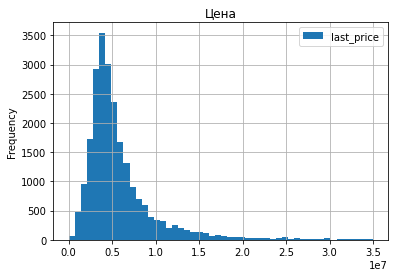

In [33]:
# формирование гистограммы
df['last_price'].plot(
    kind='hist',
    grid=True,
    bins=50,
    range=(0, 35000000),
    title='Цена',
    legend=True
)
plt.show()

Видим, что средняя стоимость квартир данного датасета колеблется в районе 5 млн. Присутствуют и редкие, выбивающиеся значения. Можно выделить основную массу квартир с ценой в диапзоне от 1 до 20 млн. Проверим, какую долю составляют выделяющиеся значения.

In [34]:
# получение доли выделяющихся значений
rare_values = len(df.query('last_price < 1000000 or last_price > 20000000')) / len(df)
print(f'Доля редких значений цены квартир {rare_values:.0%}')

Доля редких значений цены квартир 4%


Доля нехарактерных значений составляет 4% от общего числа, следовательно, можно их удалить без какой-либо серьёзной потери в данных, так как их стоимость слабо соответствует жилым квартирам в целом. Проверим влияние изменений по новому числовому описанию.

In [35]:
# формирование датафрейма без редких значений
good_df = df.query('1000000 <= last_price <= 20000000').reset_index(drop=True)
# получение нового числового описания
good_df.last_price.describe().to_frame().style.format('{:.2f}')

,last_price
count,22636.00
mean,5464771.77
std,3197738.05
min,1000000.00
25%,3400000.00
50%,4599000.00
75%,6500000.00
max,20000000.00


Данные стали более однородными, стандартное отклонение уменьшилось, а среднее значение стало ближе к медианному.

Поступим аналогичным образом с остальными параметрами.

In [36]:
# получение числового описания
df.total_area.describe().to_frame().style.format('{:.2f}')

,total_area
count,23565.00
mean,60.32
std,35.66
min,12.00
25%,40.00
50%,52.00
75%,69.70
max,900.00


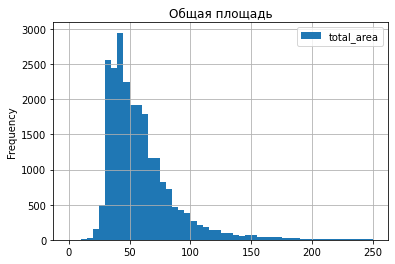

In [37]:
# формирование гистограммы
df['total_area'].plot(
    kind='hist',
    grid=True,
    bins=50,
    range=(0, 250),
    title='Общая площадь',
    legend=True
)
plt.show()

Большинство квартир занимают площадь от 30 до 80 кв.м. Есть случаи с выбивающимися площадями наподобие 12 или 900 кв.м. Возможно, это нежилые помещения.

In [38]:
# получение доли выделяющихся значений
rare_values = len(df.query('total_area < 20 or total_area > 150')) / len(df)
print(f'Доля редких значений площади квартир {rare_values:.0%}')

Доля редких значений площади квартир 2%


In [39]:
# формирование датафрейма без редких значений
good_df = good_df.query('20 <= total_area <= 150').reset_index(drop=True)

# получение нового числового описания
good_df.total_area.describe().to_frame().style.format('{:.2f}')

,total_area
count,22422.00
mean,55.83
std,21.75
min,20.00
25%,40.00
50%,51.00
75%,67.00
max,150.00


In [40]:
# получение числового описания
df.rooms.describe().to_frame().style.format('{:.2f}')

,rooms
count,23565.00
mean,2.07
std,1.08
min,0.00
25%,1.00
50%,2.00
75%,3.00
max,19.00


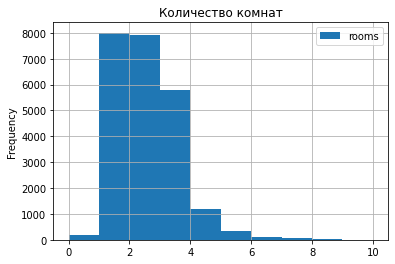

In [41]:
# формирование гистограммы
df['rooms'].plot(
    kind='hist',
    grid=True,
    range=(0, 10),
    title='Количество комнат',
    legend=True
)
plt.show()

Чаще всего встречаются квартиры с количеством комнат от 1 до 4, но при числовом описании данных попадались и выбросы, например 19 комнат.

Отсеивать квартиры с нулевым количеством комнат, хоть они и редки, не будем, так как большинство подобных значений, скорее всего, принадлежит квартирам с открытой планировкой или студиям.
Проверим предположение.

In [42]:
# получение распределения значений в предполагаемых столбцах
display(df.query('rooms == 0').open_plan.value_counts())
display(df.query('rooms == 0').studio.value_counts())

False    135
True      59
Name: open_plan, dtype: int64

True     135
False     59
Name: studio, dtype: int64

Так и есть. Убрав квартиры с нулевым количеством комнтат, мы потеряем большинство объявлений с помещениями указаных типов, что будет некорректно.

In [43]:
# получение доли выделяющихся значений
rare_values = len(df.query('rooms > 5')) / len(df)
print(f'Доля редких значений количества комнат {rare_values:.0%}')

Доля редких значений количества комнат 1%


In [44]:
# формирование датафрейма без редких значений
good_df = good_df.query('rooms <= 5').reset_index(drop=True)

# получение нового числового описания
good_df.rooms.describe().to_frame().style.format('{:.2f}')

,rooms
count,22394.00
mean,1.98
std,0.93
min,0.00
25%,1.00
50%,2.00
75%,3.00
max,5.00


In [45]:
# получение числового описания
df.ceiling_height.describe().to_frame().style.format('{:.2f}')

,ceiling_height
count,14481.00
mean,2.77
std,1.26
min,1.00
25%,2.51
50%,2.65
75%,2.80
max,100.00


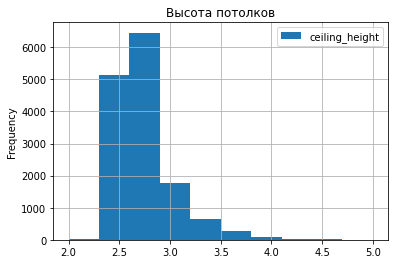

In [46]:
# формирование гистограммы
df['ceiling_height'].plot(
    kind='hist',
    grid=True,
    range=(2, 5),
    title='Высота потолков',
    legend=True
)
plt.show()

В среднем высота потолков в изначальном датасете составляет 2.7 м, на фоне чего обнаруженные значения в 1 или 100 м выглядят недостоверными, возможно, это также нежилые помещения либо же ошибка при обработке данных.

In [47]:
# получение доли выделяющихся значений
rare_values = len(df.query('ceiling_height < 2.4 or ceiling_height > 3.5')) / len(df)
print(f'Доля редких значений высоты потолка {rare_values:.0%}')

Доля редких значений высоты потолка 1%


In [48]:
# формирование датафрейма без редких значений
good_df = good_df.drop(np.where(good_df
    ['ceiling_height'] < 2.4)[0]).reset_index(drop=True)
good_df = good_df.drop(np.where(good_df
    ['ceiling_height'] > 3.5)[0]).reset_index(drop=True)

# получение нового числового описания
good_df.ceiling_height.describe().to_frame().style.format('{:.2f}')

,ceiling_height
count,13519.00
mean,2.69
std,0.21
min,2.40
25%,2.50
50%,2.64
75%,2.77
max,3.50


In [49]:
# получение числового описания
df.days_exposition.describe().to_frame().style.format('{:.2f}')

,days_exposition
count,20394.00
mean,180.74
std,219.73
min,1.00
25%,45.00
50%,95.00
75%,231.00
max,1580.00


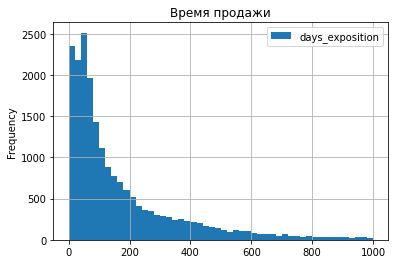

In [50]:
# формирование гистограммы
df['days_exposition'].plot(
    kind='hist',
    grid=True,
    range=(0, 1000),
    bins=50,
    legend=True,
    title='Время продажи'
)
plt.show()

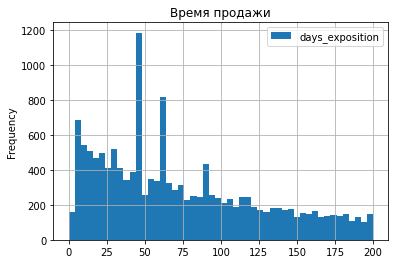

In [51]:
# формирование гистограммы с другим масштабом
df['days_exposition'].plot(
    kind='hist',
    grid=True,
    range=(0, 200),
    bins=50,
    legend=True,
    title='Время продажи'
)
plt.show()

По гистограмме видно, что основная масса квартир продаётся в первые 3-3,5 месяца после размещения объявления. Можно заметить, что за счет выбросов с долго не продающимися квартирами среднее значение отличается от медианного практически в два раза. Также заметно большое количество продаж через 1.5, 2 и 3 месяца. Возможно, это означает снятие объявления по истечении определённого установленного времени его размещения, либо же округление времени продажи до более "ровного" значения.

Уберём квартиры, продающиеся дольше 2 лет, а также со временем размещения объявления в 1 день, так как это могли быть случаи, когда объявления снимались до продажи по причине изменения каких-либо параметров или уточнения данных, отказа от продажи на определённой площадке; подобные сделки могли быть и договорными, что в свою очередь также будет неверно отражать общее положение дел.

In [52]:
# получение доли выделяющихся значений
rare_values = len(df.query('days_exposition < 2 or days_exposition > 731')) / len(df)
print(f'Доля редких значений времени продажи {rare_values:.0%}')

Доля редких значений времени продажи 3%


In [53]:
# формирование датафрейма без редких значений
good_df = good_df.drop(np.where(good_df
    ['days_exposition'] < 2)[0]).reset_index(drop=True)
good_df = good_df.drop(np.where(good_df
    ['days_exposition'] > 731)[0]).reset_index(drop=True)

# изменение типа данных столбца
good_df['days_exposition'] = (
    good_df.days_exposition
    .convert_dtypes().astype('Int32')
)
# получение нового числового описания
good_df.days_exposition.describe().to_frame().style.format('{:.2f}')

,days_exposition
count,18661.00
mean,148.40
std,154.53
min,2.00
25%,43.00
50%,90.00
75%,202.00
max,730.00


**Промежуточные итоги**

Было изучено распределение значений основных параметров квартир. Объявления с выбросами и редкими значениями в соответствующих параметрах были убраны для использования более характерных случаев продаж для дальнейшего анализа данных. Определённые же редкие значения были оставлены с учётом характера соответствующего параметра. 

### Зависимость стоимости квартиры от различных факторов

Изучим то, какие факторы больше прочих влияют на стоимость квартир. Рассмотрим следующие параметры:
1. площадь квартиры;
2. число комнат;
3. удалённость от центра;
4. этаж квартиры;
5. дата размещения объявления.

Используем матрицу корреляции и диаграммы рассеяния.

In [54]:
# получение матрицы корреляции для первых параметров
first_factors = good_df[
    ['last_price',
    'total_area',
    'rooms',
    'm_to_city_center']
]
first_factors.corr()

,last_price,total_area,rooms,m_to_city_center
last_price,1.000000,0.759946,0.472122,-0.343660
total_area,0.759946,1.000000,0.795203,-0.180561
rooms,0.472122,0.795203,1.000000,-0.115837
m_to_city_center,-0.343660,-0.180561,-0.115837,1.000000


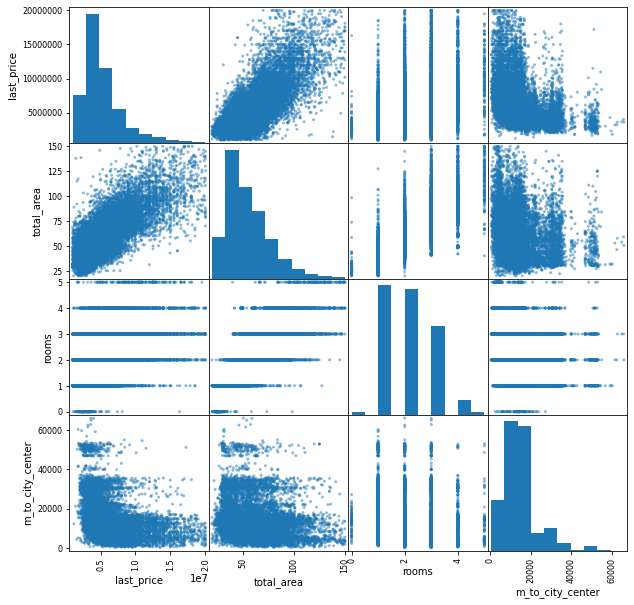

In [55]:
# получение матрицы рассеяния для первых параметров
pd.plotting.scatter_matrix(first_factors, figsize=(10, 10))
plt.show()

Видно достаточно сильную положительную корреляцию между стоимостью квартиры и её общей площадью.
Изучим оставшиеся параметры.

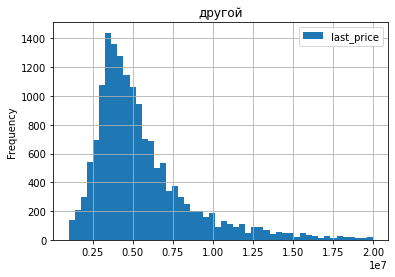

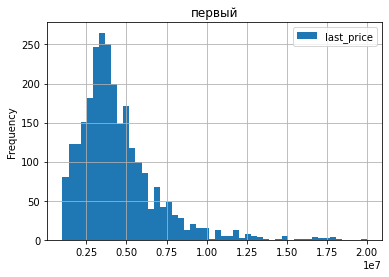

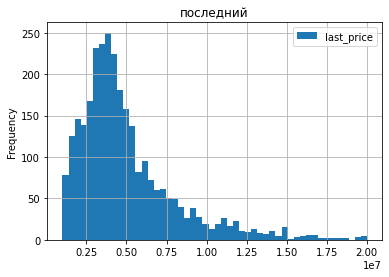

In [56]:
# получение распределения значений стоимости квартир по разным этажам
for floor, group_data in good_df.groupby('floor_category'):
    group_data.plot(
        y='last_price',
        title=floor,
        kind='hist',
        grid=True,
        bins=50
    )

Какой-либо разницы в распределении цены квартир в зависимости от этажа не наблюдается.

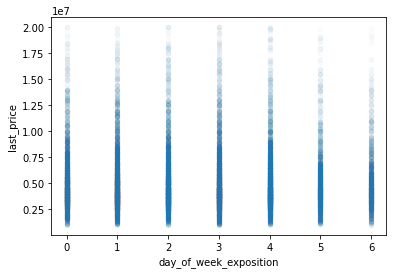

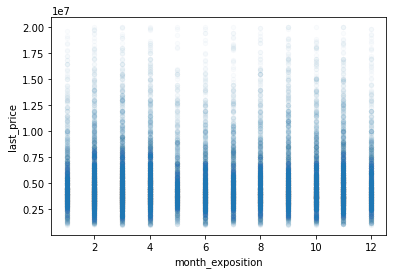

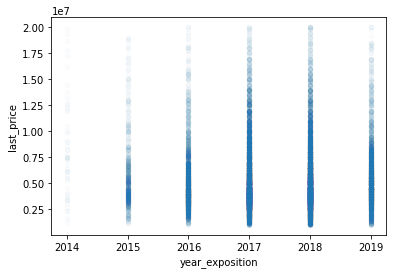

In [57]:
#получение матриц рассеяния по параметрам времени публикации объявлений
second_factors = good_df[
    ['day_of_week_exposition',
    'month_exposition',
    'year_exposition']
]
for factor in second_factors:
    good_df.plot(
        x=factor,
        y='last_price',
        kind='scatter',
        alpha=0.02
    )
    plt.show()

Видно некоторое изменение частоты, но возможно, это зависит просто от количества соответствующих объявлений. Проверим.

In [58]:
# получение количества объявлений по разным датам
for factor in second_factors:
    display(good_df.groupby(factor)
            ['last_price'].count().to_frame())

,last_price
day_of_week_exposition,
0,3282
1,3806
2,3565
3,3863
4,3673
5,1758
6,1541


,last_price
month_exposition,
1,1344
2,2401
3,2314
4,2191
5,1144
6,1581
7,1516
8,1615
9,1800


,last_price
year_exposition,
2014,50
2015,693
2016,2331
2017,7672
2018,8049
2019,2693


Так и есть. Разница обусловлена тем, что в определённые временные периоды было опубликовано большее количество объявлений.

Взглянем на отличие медианной цены квартир по различным датам.

In [59]:
# получение медианной цены
for factor in second_factors:
    display(good_df.groupby(factor)
        ['last_price'].median().to_frame().style.format('{:.0f}'))

,last_price
day_of_week_exposition,
0,4537000
1,4600000
2,4580000
3,4500000
4,4500000
5,4500000
6,4500000


,last_price
month_exposition,
1,4500000
2,4550000
3,4518500
4,4700000
5,4450000
6,4300000
7,4500000
8,4500000
9,4585000


,last_price
year_exposition,
2014,7500000
2015,4900000
2016,4400000
2017,4400000
2018,4500000
2019,4990000


Какое-то значительное отличие есть только для объявлений от 2014 года, но вероятно, это так также по причине слишком малого количества самих объявлений.

**Промежуточные выводы**

После рассмотрения взаимосвязей различных параметров из всех рассмотренных факторов только один ощутимо влияет на цену квартиры, а именно её площадь. Какой-либо заменой корелляции между остальными параметрами и стоимостью выявить не удалось.

### Выборка характерных населённых пунктов

Рассмотрим характерные для данного датасета населённые пункты — топ-10 с наибольшим количеством объявлений, из которых выделим пункты с самой высокой и самой низкой стоимостью за кв. м.

In [60]:
# получение пунктов с наибольшим количеством объявлений
top_10_by_advertisement = good_df.pivot_table(
    index='locality_name',
    values='price_square_m',
    aggfunc=['median', 'count']
)
top_10_by_advertisement.columns=['price_square_m', 'count']
top_10_by_advertisement = top_10_by_advertisement.sort_values(
    by=['count'], ascending=False).head(10)

# отображение пунктов с градацией по цене
top_10_by_advertisement = top_10_by_advertisement.sort_values(
    by=['price_square_m'], ascending=False)
top_10_by_advertisement

,price_square_m,count
locality_name,,
санкт-петербург,103550.0,14118
пушкин,99725.0,338
деревня кудрово,91831.5,280
посёлок парголово,91428.0,319
посёлок мурино,85878.0,500
посёлок шушары,76747.5,426
колпино,74468.0,331
гатчина,67860.0,290
всеволожск,65789.0,380


In [61]:
# отображение пунктов с максимальным и минимальным значением
i = top_10_by_advertisement.index[0]
y = top_10_by_advertisement.index[-1]
print(f'Населённый пункт с самой высокой ценой — {i}')
print(f'Населённый пункт с самой низкой ценой — {y}')


Населённый пункт с самой высокой ценой — санкт-петербург
Населённый пункт с самой низкой ценой — выборг


**Промежуточные выводы**

Из наиболее активных по продажам регионов населённый пункт с самой высокой ценой за кв. м. жилья — Санкт-Петербург, а с самой низкой — Выборг.

### Определение границ центральной зоны

Среди параметров квартир есть расстояние, указывающее, в скольких метрах от центра находится конкретная квартира. Определимся с границами центральной области. Для анализа возьмём квартиры из Санкт-Петербурга.

In [62]:
# создание среза с квартирами в Санкт-Петербурге
spb_apartments = good_df.query('locality_name == "санкт-петербург"')

# получение столбца со значениями расстояния в километрах
spb_apartments = spb_apartments.assign(
    km_to_city_center = (spb_apartments.m_to_city_center / 1000)
)
spb_apartments.km_to_city_center = (
    spb_apartments.km_to_city_center.convert_dtypes().astype('Int32')
)

In [63]:
# получение средней цены для каждого километра
price_by_km = spb_apartments.pivot_table(
    index='km_to_city_center',
    values='last_price',
    aggfunc='median'
)

# проосмотр значений
price_by_km

,last_price
km_to_city_center,
0,9000000
1,9200000
2,8418000
3,7800000
4,8500000
5,7810000
6,6900000
7,6900000
8,6200000


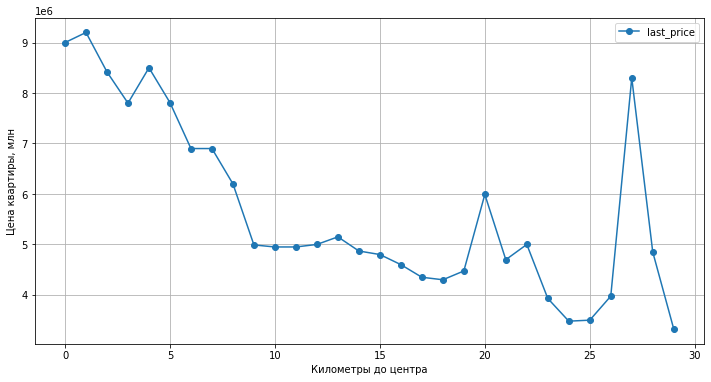

In [64]:
# получение графика для нахождения границы с сильным изменением стоимости
ax = price_by_km.plot(
    style='o-',
    grid=True,
    figsize=(12, 6)
)
ax.set_xlabel('Километры до центра')
ax.set_ylabel('Цена квартиры, млн')
plt.show()

**Промежуточные выводы**

По полученным данным видно, что средняя цена квартир становится стабильно ниже после 9 км от центра. Примем это расстояние за границу центральной области.

### Сопоставление данных для квартир в центре и всего датасета

Выделим квартиры в центре, снова изучим распределения значений основных параметров, а также факторы, в первую очередь влияющие на стоимость квартиры. Сравним полученные выводы с выводами по всей базе.

#### Изучение параметров

In [65]:
# создание среза квартир в центре
central_apartments = good_df.query('m_to_city_center < 9000')

# получение числового описания
central_apartments.last_price.describe().to_frame().style.format('{:.2f}')

,last_price
count,3287.00
mean,8430023.83
std,3646191.14
min,1600000.00
25%,5771378.50
50%,7700000.00
75%,10450000.00
max,20000000.00


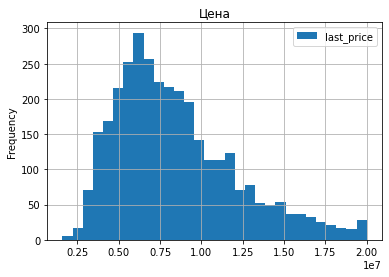

In [66]:
# формирование гистограммы
central_apartments['last_price'].plot(
    kind='hist',
    grid=True,
    bins=30,
    title='Цена',
    legend=True
)
plt.show()

In [67]:
# оотоображение разницы средних показателей целого датасета и среза
i = good_df['last_price'].median()
y = central_apartments['last_price'].median()
k = (y-i)/i
print(f'Средняя цена квартир всего датасета {i:.0f}')
print(f'Средняя цена квартир в центре {y:.0f}')
print(f'Разница составляет {k:.2%}')

Средняя цена квартир всего датасета 4500000
Средняя цена квартир в центре 7700000
Разница составляет 71.11%


Cредняя стоимость квартир в центре значительно выросла по сравнению со средней ценой для всего датасета.

In [68]:
# получение числового описания
central_apartments.total_area.describe().to_frame().style.format('{:.2f}')

,total_area
count,3287.00
mean,69.94
std,26.43
min,20.00
25%,48.00
50%,67.00
75%,86.50
max,150.00


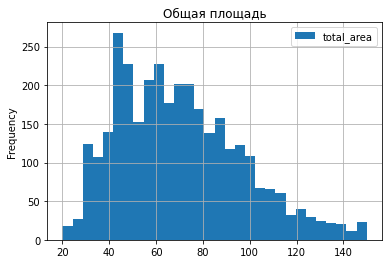

In [69]:
# формирование гистограммы
central_apartments['total_area'].plot(
    kind='hist',
    grid=True,
    bins=30,
    title='Общая площадь',
    legend=True
)
plt.show()

In [70]:
# оотоображение разницы средних показателей целого датасета и среза
i = good_df['total_area'].median()
y = central_apartments['total_area'].median()
k = (y-i)/i
print(f'Средняя площадь квартир всего датасета {i:.0f}')
print(f'Средняя площадь квартир в центре {y:.0f}')
print(f'Разница составляет {k:.2%}')

Средняя площадь квартир всего датасета 50
Средняя площадь квартир в центре 67
Разница составляет 32.67%


Средняя площадь центральных квартир также увеличилась.

In [71]:
# получение числового описания
central_apartments.rooms.describe().to_frame().style.format('{:.2f}')

,rooms
count,3287.00
mean,2.38
std,1.02
min,0.00
25%,2.00
50%,2.00
75%,3.00
max,5.00


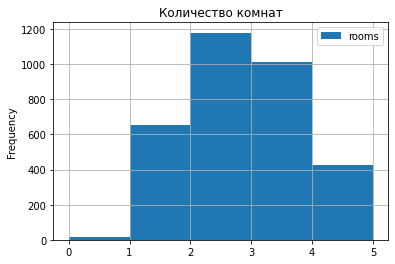

In [72]:
# формирование гистограммы
central_apartments['rooms'].plot(
    kind='hist',
    grid=True,
    bins=5,
    title='Количество комнат',
    legend=True
)
plt.show()

In [73]:
# оотоображение разницы средних показателей целого датасета и среза
i = good_df['rooms'].median()
y = central_apartments['rooms'].median()
k = (y-i)/i
print(f'Среднее количество комнат для всего датасета {i:.0f}')
print(f'Среднее количество комнат для квартир в центре {y:.0f}')
print(f'Разница составляет {k:.2%}')

Среднее количество комнат для всего датасета 2
Среднее количество комнат для квартир в центре 2
Разница составляет 0.00%


По распределению количества комнат изменений нет.

In [74]:
# получение числового описания
central_apartments.ceiling_height.describe().to_frame().style.format('{:.2f}')

,ceiling_height
count,2083.00
mean,2.94
std,0.27
min,2.40
25%,2.73
50%,3.00
75%,3.11
max,3.50


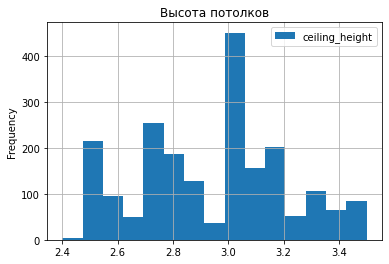

In [75]:
# формирование гистограммы
central_apartments['ceiling_height'].plot(
    kind='hist',
    grid=True,
    bins=15,
    title='Высота потолков',
    legend=True
)
plt.show()

In [76]:
# оотоображение разницы средних показателей целого датасета и среза
i = good_df['ceiling_height'].median()
y = central_apartments['ceiling_height'].median()
k = (y-i)/i
print(f'Средняя высота потолков квартир всего датасета {i:.0f}')
print(f'Средняя высота потолков квартир в центре {y:.0f}')
print(f'Разница составляет {k:.2%}')

Средняя высота потолков квартир всего датасета 3
Средняя высота потолков квартир в центре 3
Разница составляет 13.64%


Высота потолков также практически не изменилась, но распределение стало более хаотичным.

In [77]:
# получение числового описания
central_apartments.days_exposition.describe().to_frame().style.format('{:.2f}')

,days_exposition
count,2807.00
mean,174.79
std,173.46
min,3.00
25%,47.50
50%,106.00
75%,252.00
max,730.00


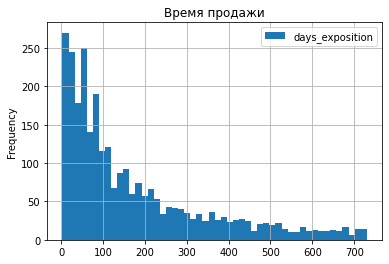

In [78]:
# формирование гистограммы
central_apartments['days_exposition'].plot(
    kind='hist',
    grid=True,
    bins=50,
    title='Время продажи',
    legend=True
)
plt.show()

In [79]:
# отображение разницы средних показателей целого датасета и среза
i = good_df['days_exposition'].median()
y = central_apartments['days_exposition'].median()
k = (y-i)/i
print(f'Среднее время продажи квартир всего датасета {i:.0f}')
print(f'Среднее время продажи квартир в центре {y:.0f}')
print(f'Разница составляет {k:.2%}')

Среднее время продажи квартир всего датасета 90
Среднее время продажи квартир в центре 106
Разница составляет 17.78%


Квартиры в центре в среднем продаются чуть дольше, но характер распределения значений по сравнению со всей базой не поменялся, большинство квартир также продаются в первые 3-3,5 месяца.

#### Зависимость стоимости квартиры от различных факторов

In [80]:
# получение матрицы корреляции для первых параметров
first_factors = central_apartments[
    ['last_price',
    'total_area',
    'rooms',
    'm_to_city_center']
]
first_factors.corr()

,last_price,total_area,rooms,m_to_city_center
last_price,1.000000,0.737852,0.461974,-0.189872
total_area,0.737852,1.000000,0.795914,-0.239232
rooms,0.461974,0.795914,1.000000,-0.228273
m_to_city_center,-0.189872,-0.239232,-0.228273,1.000000


Влияние первых параметров на стоимость квартиры осталось неизменным: значительно цена зависит только от общей площади помещения.

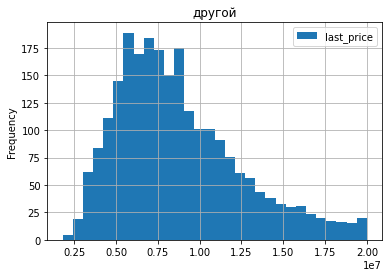

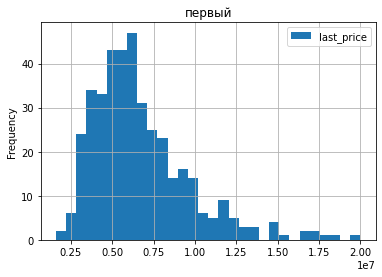

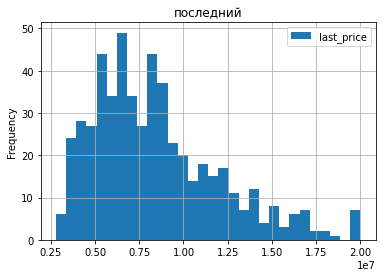

In [81]:
# получение распределения значений стоимости квартир по разным этажам
for floor, group_data in central_apartments.groupby('floor_category'):
    group_data.plot(
        y='last_price',
        title=floor,
        kind='hist',
        grid=True,
        bins=30
    )

Можно сделать вывод, что этаж квартиры по-прежнему практически не влияет на её стоимость.

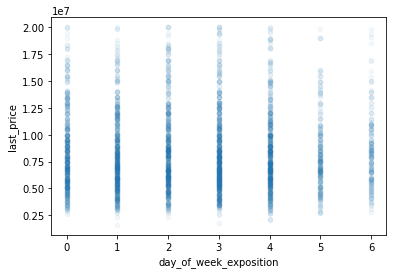

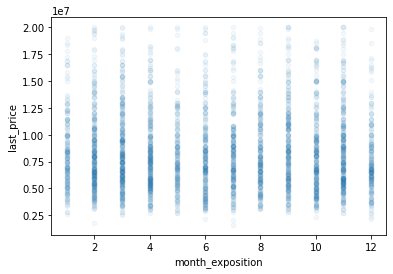

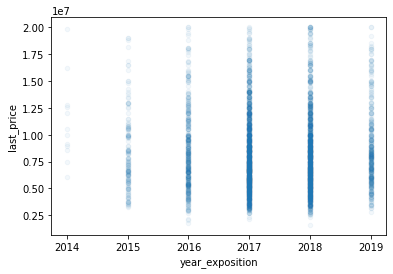

In [82]:
#получение матриц рассеяния по параметрам времени публикации объявлений
second_factors = central_apartments[
    ['day_of_week_exposition',
    'month_exposition',
    'year_exposition']
]
for factor in second_factors:
    central_apartments.plot(
        x=factor,
        y='last_price',
        kind='scatter',
        alpha=0.05
    )
    plt.show()

In [83]:
# получение количества объявлений по разным датам
for factor in second_factors:
    display(central_apartments.groupby(factor)
            ['last_price'].count().to_frame())

,last_price
day_of_week_exposition,
0,486
1,568
2,561
3,657
4,570
5,258
6,187


,last_price
month_exposition,
1,195
2,335
3,350
4,322
5,197
6,260
7,246
8,261
9,296


,last_price
year_exposition,
2014,12
2015,153
2016,408
2017,1223
2018,1120
2019,371


In [84]:
# получение медианной цены
for factor in second_factors:
    display(central_apartments.groupby(factor)
            ['last_price'].median().to_frame().style.format('{:.0f}'))

,last_price
day_of_week_exposition,
0,7770000
1,7554300
2,8000000
3,7650000
4,7610000
5,7525000
6,8000000


,last_price
month_exposition,
1,7800000
2,7700000
3,7900000
4,7625000
5,7500000
6,7500000
7,8000000
8,7600000
9,8425000


,last_price
year_exposition,
2014,10245000
2015,7400000
2016,7774500
2017,7500000
2018,7755000
2019,7950000


И снова полученные данные по сути идентичны аналогичным данным по всей базе. Средняя стоимость квартиры значительно отличается только для первого года объявлений датасета, вероятно, по причине их сильно малого количества. В целом стоимость и квартир в центре не зависит от даты публикации объявления.

**Промежуточные выводы**

Рассмотренные особенности параметров квартир в центре, а также определение факторов, в первую очередь влияющих на их цену, в целом подтверждают выводы по итогам подобного анализа всего датасета. Каких-либо значительных отличий, кроме увеличения средней площади, а скорее всего, как следствие, и средней стоимости центральных квартир, не обнаружено.

## Итоговый вывод

В рамках исследовния была произведена следующая работа. Для корректного взаимодействия с данными были решены проблемы с их качеством: обработаны пропуски, изменены типы данных, переименованы столбцы, строковые значения приведены к одному регистру. Для более эффективной работы с таблицей были созданы дополнительные столбцы.

На этапе анализа данных были изучены особенности основных параметров квартир, а также отсеяны выбросы и редкие значения для дальнейшей работы с более характерными данными. Далее была проанализирована степень влияния различных факторов на стоимость квартир, что и являлось основной целью исследования.
Дополнительно была выделена группа объектов в центре, для которой были изучены те же параметры и определена зависимость цены от факторов, аналогичных общему перечню помещений. Выводы по общей базе и по отдельному срезу данных в итоге совпали, что указывает в том числе на их достоверность.

Формулируя итоговый вывод, можно сказать, что из всех рассмотренных факторов по сути единственным, определённо влияющим на стоимость квартиры, является её площадь. Остальные факторы не продемонстрировали какой-либо значительной связи с ценой помещений. 

В качестве дополнительной рекомендации для компании в целом по работе с данными/датасетами можно указать на необходимоость обратить внимание на большое количество пропусков относительно параметров, связанных с территориальным расположением объектов. Возможно, стоит собирать больше данных о точноой геолокации квартир. Также, вероятно, следует сделать более точной фильтрацию данных, так как в предоставленном датасете о квартирах можно было заметить значения параметров, явно не соответствующие жилым помещениям.
